In [1]:
from distmesh import *
from FEM_TPT import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy

# personal libraries
import helpers as helpers

## Load Trajectory, Diffusions, Free Energy

In [2]:
# Load Trajectory
fname = "LJ7_traj.npz"
inData = np.load(fname)
data = inData["data"]
print(f"Shape of trajectory data:{data.shape}")
N = data.shape[1]
print(f"Number of data points:{N}")

# Load Diffusions
fname = "LJ7_traj_diffusions.npz"
inData = np.load(fname)
diffusions = inData["diffusions"]
print(f"Shape of diffusion data:{diffusions.shape}")


# Load Free Energy
fname = "LJ7_free_energy_grid.npz"
inData = np.load(fname)
free_energy = inData["free_energy"]
nx = inData["nx"]
ny = inData["ny"]
xmin = inData["xmin"]
xmax = inData["xmax"]
ymin = inData["ymin"]
ymax = inData["ymax"]
print(f"Shape of free energy data:{free_energy.shape}")
print(f"nx:{nx}")
print(f"ny:{ny}")
print(f"xmin:{xmin}")
print(f"xmax:{xmax}")
print(f"ymin:{ymin}")
print(f"ymax:{ymax}")

Shape of trajectory data:(2, 10000)
Number of data points:10000
Shape of diffusion data:(10000, 2, 2)
Shape of free energy data:(401, 201)
nx:201
ny:401
xmin:0.2
xmax:1.2
ymin:-0.5
ymax:1.7


## Plot Trajectory

(-0.5, 1.7)

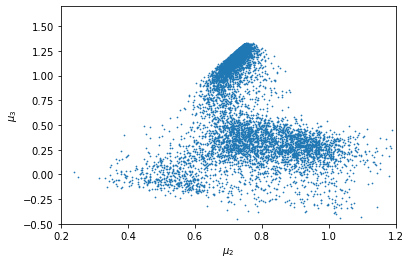

In [3]:
fig = plt.figure() 
plt.scatter(data[0, :], data[1, :], s=0.5)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])


# Plot Diffusion Tensors

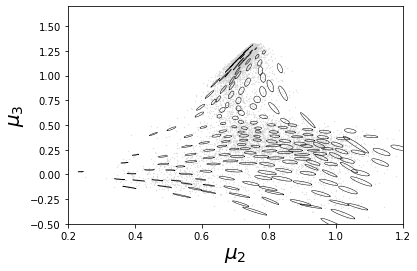

In [4]:
# Cluster data points for better visualization
n_clusters = 200
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(data.T)
    
# Plot sampling of diffusion tensors
fig = plt.figure() 
plt.scatter(data[0, :], data[1, :], s=0.1, c='lightgray')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel(r'$\mu_2$', size=20)
plt.ylabel(r'$\mu_3$', size=20)
for i in range(n_clusters):
    idx = np.argmin(np.sum((data.T - kmeans.cluster_centers_[i,:])**2,axis=1))
    C = diffusions[idx, :, :]
    helpers.plot_cov_ellipse(C, data[:, idx], plot_scale=0.01)
plt.show()



## Plot Free Energy

Text(0, 0.5, '$\\mu_3$')

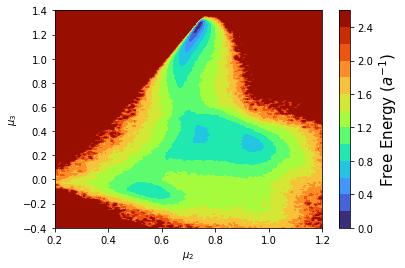

In [5]:
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
xx, yy = np.meshgrid(x, y)

plt.figure()
plt.contourf(xx, yy, free_energy, levels=15, cmap='turbo')
#plt.scatter(data[0, :], data[1, :], s=1, c='k')

cbar = plt.colorbar()
cbar.set_label(r'Free Energy ($a^{-1}$)', size=15)
plt.xlim([0.2, 1.2])
plt.ylim([-0.4, 1.4])
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')

In [6]:
# # select region for triangulation
# Vbdry = 1.8
# Va = 1
# Vb = 0.2
# ax = plt.axes()
# fig = plt.gcf()
# fig.set_size_inches(10, 10)
# plt.contour(xx, yy, free_energy, [Vb,Va,Vbdry], cmap='turbo')
# ax.xaxis.set_major_locator(plt.MultipleLocator(0.05))
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
# plt.grid(visible = True)
# plt.savefig('LJ7domain.pdf')


# h = 0.01

# cB = plt.contour(xx, yy, free_energy, [Vb])
# for item in cB.collections:
#     for i in item.get_paths():
#         pB = i.vertices

# pB = np.concatenate((pB,np.reshape(pB[-1,:],(1,2))),axis=0)        
# pB = reparametrization(pB,h)
# NB = np.size(pB,axis=0)
# pB = pB[0:NB-1,:]
# NB = np.size(pB,axis=0)

# pA = np.array([[0.55,-0.025],[0.60,-0.05],[0.625,-0.10],[0.63,-0.15],[0.60,-0.165],[0.55,-0.15],\
#               [0.50,-0.12],[0.47,-0.10],[0.47,-0.06],[0.50,-0.03],[0.55,-0.025]])
# pA = reparametrization(pA,h)
# NA = np.size(pA,axis=0)
# pA = pA[0:NA-1,:]
# NA = np.size(pA,axis=0)


# p_outer = np.array([[0.75,1.335],[0.77,1.35],[0.80,1.335],[0.82,1.30],[0.83,1.25],[0.84,1.20],[0.85,1.15],\
#                     [0.875,0.65],[0.925,0.55],[0.975,0.50],[1.15,0.40],[1.175,0.25],[1.18,0.05],[1.17,0.0],[1.15,-0.05],\
#                     [1.12,-0.09],[1.10,-0.15],[1.10,-0.25],[1.05,-0.35],[0.75,-0.35],[0.25,-0.05],[0.25,0.0],[0.40,0.20],\
#                     [0.55,0.65],[0.55,0.75],[0.575,0.85],[0.60,0.93],[0.62,1.0],[0.73,1.30],[0.75,1.335]])
# p_outer = reparametrization(p_outer,h)
# Nouter = np.size(p_outer,axis=0)
# p_outer = p_outer[0:Nouter-1,:]
# Nouter = np.size(p_outer,axis=0)

# plt.scatter(p_outer[:,0],p_outer[:,1])
# plt.scatter(pB[:,0],pB[:,1])
# plt.scatter(pA[:,0],pA[:,1])

In [7]:
# with open('LJ7_pts_outer_bdry.csv', 'w', newline='') as file:
#     mywriter = csv.writer(file, delimiter=',')
#     mywriter.writerows(p_outer)
# with open('LJ7_pts_A_bdry.csv', 'w', newline='') as file:
#     mywriter = csv.writer(file, delimiter=',')
#     mywriter.writerows(pA)  
# with open('LJ7_pts_B_bdry.csv', 'w', newline='') as file:
#     mywriter = csv.writer(file, delimiter=',')
#     mywriter.writerows(pB)        

11648
21324
182
84


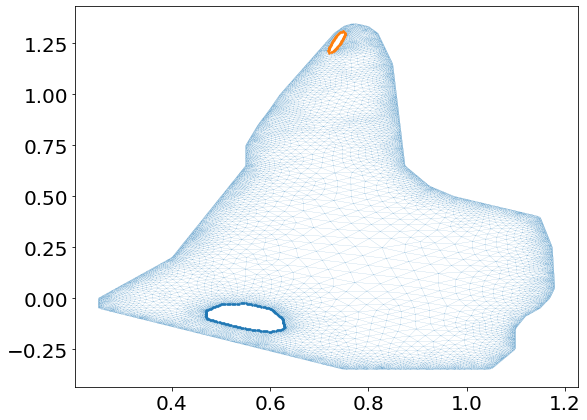

In [40]:
# download triangular mesh
pts = np.loadtxt('LJ7_pts.csv', delimiter=',', dtype=float)
tri = np.loadtxt('LJ7_tri.csv', delimiter=',', dtype=int)
Npts = np.size(pts,axis = 0)
Ntri = np.size(tri,axis = 0)
print(Npts)
print(Ntri)
# download indices of mesh points at the boundaries of A and B
Aind = np.loadtxt('LJ7_Abdry.csv', delimiter=',', dtype=int) # find mesh points on \partial A
NAind = np.size(Aind)
print(NAind)
Bind = np.loadtxt('LJ7_Bbdry.csv', delimiter=',', dtype=int)  # find mesh points on \partial B
NBind = np.size(Bind)
print(NBind)

fig = plt.gcf()
fig.set_size_inches(9, 7)
plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.1)
plt.scatter(pts[Aind,0],pts[Aind,1],s = 2)
plt.scatter(pts[Bind,0],pts[Bind,1],s = 2)
plt.savefig('LJ72D_trimesh.pdf')


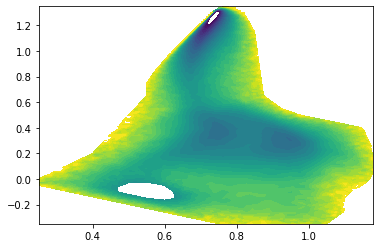

In [9]:
# interpolate the free enegry from the regular grid onto the mesh points
FE = scipy.interpolate.RegularGridInterpolator((x,y),np.transpose(free_energy)) #, method = "linear",bounds_error=False, fill_value = 1.8)
Fpts = FE(pts)
plt.tricontourf(pts[:,0], pts[:,1],tri,Fpts,np.arange(0.2,1.8,0.05) )

In [10]:
# interpolate entries of the diffusion matrix onto the mesh points
print(np.shape(data))
print(np.shape(diffusions[:,0,0]))
M11grid = scipy.interpolate.griddata(np.transpose(data),diffusions[:,0,0],(xx,yy),method = 'linear')
M12grid = scipy.interpolate.griddata(np.transpose(data),diffusions[:,0,1],(xx,yy),method = 'linear')
M22grid = scipy.interpolate.griddata(np.transpose(data),diffusions[:,1,1],(xx,yy),method = 'linear')

(2, 10000)
(10000,)


0  points with nan or inf values
0  points with nan or inf values
0  points with nan or inf values
493  points with nan or inf values
493  points with nan or inf values
493  points with nan or inf values
0  points with nan or inf values
0  points with nan or inf values
0  points with nan or inf values


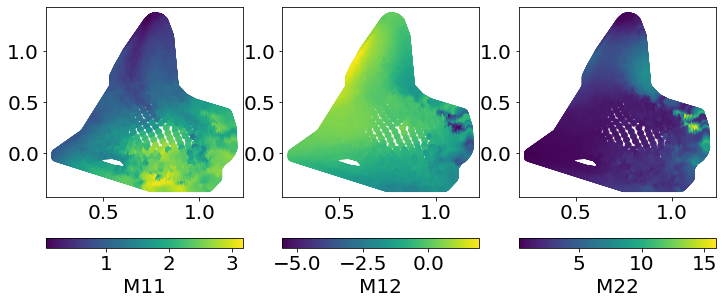

In [41]:
def check_inf_nan(arr):
    ind_bad = np.argwhere(np.isnan(arr))
    print(np.size(ind_bad)," points with nan or inf values")
    return ind_bad

ind_bad = check_inf_nan(diffusions[:,0,0])
ind_bad = check_inf_nan(diffusions[:,0,1])
ind_bad = check_inf_nan(diffusions[:,1,1])


M11fun = scipy.interpolate.RegularGridInterpolator((x,y),np.transpose(M11grid))
M12fun = scipy.interpolate.RegularGridInterpolator((x,y),np.transpose(M12grid))
M22fun = scipy.interpolate.RegularGridInterpolator((x,y),np.transpose(M22grid))
M11pts = M11fun(pts)
M12pts = M12fun(pts)
M22pts = M22fun(pts)

ind_bad = check_inf_nan(M11pts)
M11fun_NN = scipy.interpolate.NearestNDInterpolator(np.transpose(data), diffusions[:,0,0])
M11pts[ind_bad] = M11fun_NN(pts[ind_bad,:])

ind_bad = check_inf_nan(M12pts)
M12fun_NN = scipy.interpolate.NearestNDInterpolator(np.transpose(data), diffusions[:,0,1])
M12pts[ind_bad] = M12fun_NN(pts[ind_bad,:])

ind_bad = check_inf_nan(M22pts)
M22fun_NN = scipy.interpolate.NearestNDInterpolator(np.transpose(data), diffusions[:,1,1])
M22pts[ind_bad] = M22fun_NN(pts[ind_bad,:])

fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.subplot(1,3,1)
plt.scatter(pts[:,0], pts[:,1],c = M11pts)
plt.colorbar(label="M11", orientation="horizontal")
ind_bad = check_inf_nan(M11pts)
plt.scatter(pts[ind_bad,0], pts[ind_bad,1],s = 0.1)
plt.subplot(1,3,2)
plt.scatter(pts[:,0], pts[:,1],c = M12pts)
plt.colorbar(label="M12", orientation="horizontal")
ind_bad = check_inf_nan(M12pts)
plt.scatter(pts[ind_bad,0], pts[ind_bad,1],s = 0.1)
plt.subplot(1,3,3)
plt.scatter(pts[:,0], pts[:,1],c = M22pts)
plt.colorbar(label="M22", orientation="horizontal")
ind_bad = check_inf_nan(M22pts)
plt.scatter(pts[ind_bad,0], pts[ind_bad,1],s = 0.1)
plt.savefig('LJ72D_Mmatrix.pdf')


In [28]:
# find the committor
beta = 5
q = FEM_committor_solver(pts,tri,Aind,Bind,Fpts,M11pts,M12pts,M22pts,beta)

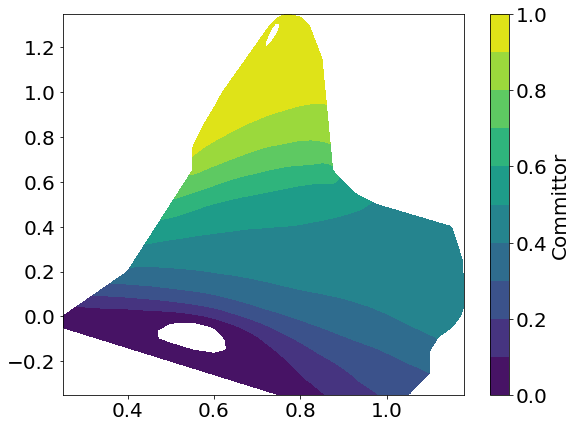

In [33]:
# visualize the committor
fig = plt.gcf()
fig.set_size_inches(9, 7)
plt.tricontourf(pts[:,0], pts[:,1],tri,q,np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
plt.colorbar(label="Committor", orientation="vertical")
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
plt.savefig('LJ72D_committor.pdf')

In [31]:
# find the reactive current and the transition rate
Rcurrent, Rrate = reactive_current_and_transition_rate(pts,tri,Fpts,M11pts,M12pts,M22pts,beta,q)
print("Transition rate = ",Rrate)

Transition rate =  0.0978225552270311


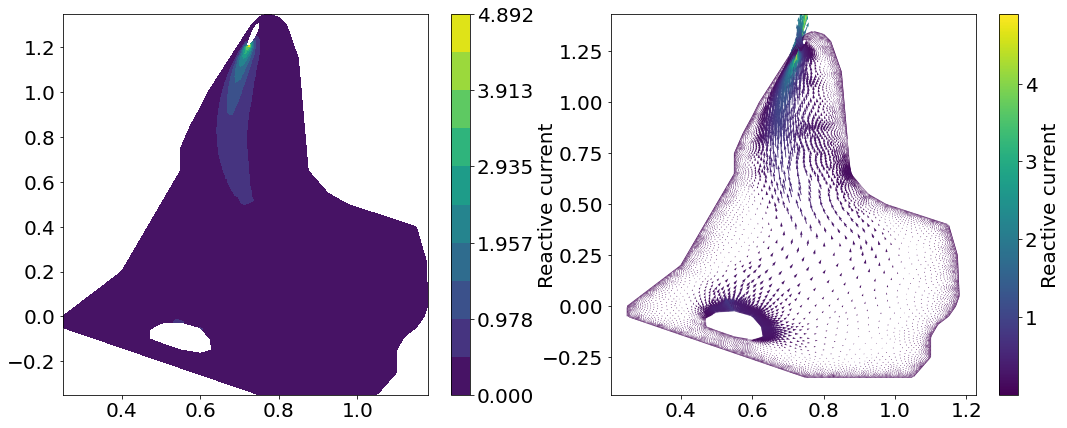

In [36]:
# visualize the reactive current
# find the absolute value of the reactive current
ARcurrent = np.linalg.norm(Rcurrent,axis = 1)
ARCmax = np.amax(ARcurrent)
fig = plt.gcf()
fig.set_size_inches(18, 7)
plt.subplot(1,2,1)
plt.tricontourf(pts[:,0], pts[:,1],tri,ARcurrent,np.linspace(0,ARCmax,11))
plt.colorbar(label="Reactive current", orientation="vertical")
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
#plt.savefig('LJ7_rcurrent.pdf')
#plt.show()
plt.subplot(1,2,2)
plt.quiver(pts[:,0],pts[:,1],Rcurrent[:,0],Rcurrent[:,1],ARcurrent)
plt.colorbar(label="Reactive current", orientation="vertical")
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
plt.savefig('LJ7_rcurrent.pdf')

In [37]:
# save the mesh point, the committor, and the reactive current
TPTdata = np.concatenate((pts,np.reshape(q,(Npts,1)),Rcurrent),axis = 1)
with open('LJ7_TPTdata.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(TPTdata)